In [45]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom

# What we're here for
from tyssue.topology.sheet_topology import type1_transition

## model and solver
from tyssue.dynamics.sheet_vertex_model import SheetModel as model
from tyssue.solvers.quasistatic import QSSolver

# 2D plotting
from tyssue.draw import sheet_view

#I/O
from tyssue.io import hdf5
plt.style.use('bmh')

import logging

from tyssue.utils import data_at_opposite



Reseting column contractility of the face dataset with new specs
Reseting column vol_elasticity of the face dataset with new specs
Reseting column prefered_height of the face dataset with new specs
Reseting column prefered_area of the face dataset with new specs
Reseting column prefered_vol of the face dataset with new specs
Reseting column radial_tension of the vert dataset with new specs
Reseting column is_active of the vert dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column uz of the edge dataset with new specs
Reseting column line_tension of the edge dataset with new specs
Reseting column is_active of the edge dataset with new specs


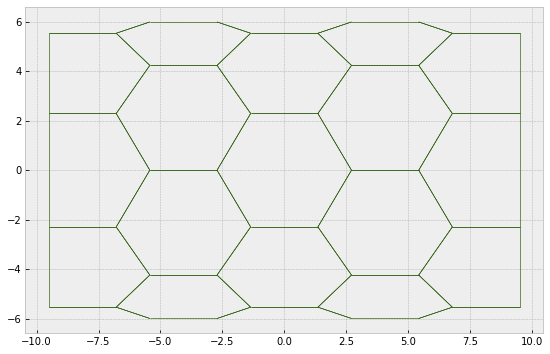

In [46]:
solver = QSSolver(with_t1=True)

h5store = '../data/hf5/small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store,
                              data_names=['face', 'vert', 'edge'])
specs = config.geometry.cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)
sheet.sanitize(trim_borders=True)

geom.update_all(sheet)

nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = model.dimensionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

solver_settings = {'options': {'gtol':1e-4}}

sheet.get_opposite()
sheet.vert_df.is_active = 1

fig, ax = sheet_view(sheet, ['z', 'x'],
                     edge={'head_width': 0},
                     vert={'visible': False})
fig.set_size_inches(10, 6)


True


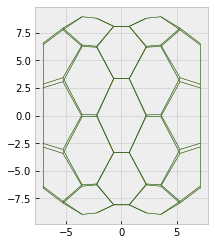

In [47]:
res = solver.find_energy_min(sheet, geom, model)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])

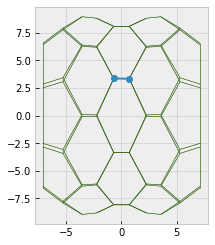

In [48]:
sheet.settings["threshold_length"] = 1e-1
sheet.face_df['id'] = sheet.face_df.index


before = sheet.copy()

edge = 41


fig, ax = sheet_view(sheet, ['z', 'x'])

ax.plot(
    sheet.edge_df.loc[edge, ['sz', 'tz']],
    sheet.edge_df.loc[edge, ['sx', 'tx']],
    "o-"
)

In [49]:

sheet.edge_df.loc[edge, "line_tension"] *= 8
opp = sheet.edge_df.loc[edge, "opposite"]
face = sheet.edge_df.loc[edge, "face"]
sheet.edge_df.loc[opp, "line_tension"] *= 8

# If you put a higher value here (like 20), the face is eliminated and 
# many T1 happen
sheet.face_df.loc[face, "contractility"] *= 2


In [50]:
res = solver.find_energy_min(sheet, geom, model)

False


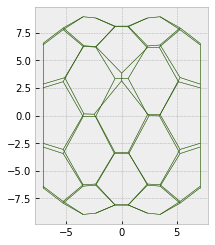

In [51]:
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])


In [53]:
def get_neighbour_changes(before, after):


    before.get_opposite()
    after.get_opposite()
    before.edge_df['face_id'] = before.upcast_face("id")
    after.edge_df['face_id'] = after.upcast_face("id")

    before.edge_df['opp_face'] = data_at_opposite(before, before.edge_df['face_id'], free_value=-1).astype(int)
    after.edge_df['opp_face'] = data_at_opposite(after, after.edge_df['face_id'], free_value=-1).astype(int)

    facepairs_before = set(before.edge_df[['face_id', 'opp_face']].apply(frozenset, axis=1))
    facepairs_after = set(after.edge_df[['face_id', 'opp_face']].apply(frozenset, axis=1))


    face_pair_changes = facepairs_before.difference(facepairs_after)
    return face_pair_changes
    

In [54]:
after = sheet.copy()
get_neighbour_changes(before, after)

{frozenset({7, 12})}

In [55]:
from tyssue.topology.sheet_topology import type1_transition

![Type 1 transition](../data/png/t1_transition.png)

In [56]:
sheet = before.copy()

In [57]:
type1_transition(sheet, edge)
geom.update_all(sheet)


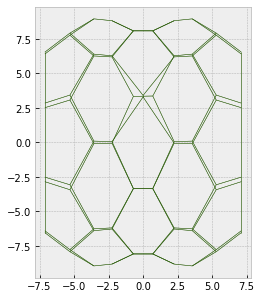

In [58]:

fig, ax = sheet_view(sheet, ['z', 'x'])

#ax.set_ylim(-5, 5)
#ax.set_xlim(-9, 3)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


In [59]:
after = sheet.copy()
get_neighbour_changes(before, after)

{frozenset({7, 12})}